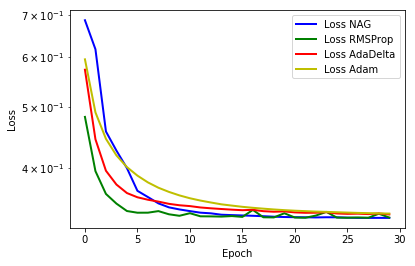

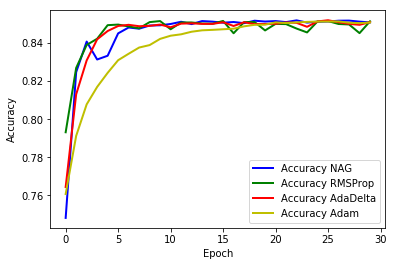

In [2]:

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def NAG(X,y,X_test,y_test,lamb,eta,gama):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    v = np.zeros((123,1))
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
            
            temp_3 = (y_train*X_train)/(1+np.exp(y_train*(X_train.dot(w-gama*v))))
            temp_4 = np.sum(temp_3,axis=0)
            temp_4 = temp_4.reshape(123,1)
            g = lamb*(w-gama*v)-temp_4/len(X_train)
            v = gama*v + eta*g
            w -= v
        
        temp_1 = 1+np.exp(-(y_test*(X_test.dot(w))))
        temp_2 = np.log(temp_1).sum()
        test_loss.append(temp_2/len(X_test)+0.5*lamb*np.square(w).sum())
        
        z = X_test.dot(w)
        h = 1/(1+np.exp(-z))
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

def RMSProp(X,y,X_test,y_test,lamb,eta,gama,epsilon):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    G = np.zeros((123,1))
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
            
            temp_3 = (y_train*X_train)/(1+np.exp(y_train*(X_train.dot(w))))
            temp_4 = np.sum(temp_3,axis=0)
            temp_4 = temp_4.reshape(123,1)
            g = lamb*w-temp_4/len(X_train)
            G = gama*G + (1-gama) * np.square(g)
            w -= (eta/(np.sqrt(G+epsilon)))*g
        
        temp_1 = 1+np.exp(-(y_test*(X_test.dot(w))))
        temp_2 = np.log(temp_1).sum()
        test_loss.append(temp_2/len(X_test)+0.5*lamb*np.square(w).sum())
        
        z = X_test.dot(w)
        h = 1/(1+np.exp(-z))
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

def AdaDelta(X,y,X_test,y_test,lamb,gama,epsilon):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    G = np.zeros((123,1))
    delta_t = np.zeros((123,1))
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
        
            temp_3 = (y_train*X_train)/(1+np.exp(y_train*(X_train.dot(w))))
            temp_4 = np.sum(temp_3,axis=0)
            temp_4 = temp_4.reshape(123,1)
            g = lamb*w-temp_4/len(X_train)
            G = gama*G + (1-gama)*np.square(g)
            delta_w = -(np.sqrt(delta_t+epsilon)/np.sqrt(G+epsilon))*g
            w += delta_w
            delta_t = gama*delta_t + (1-gama)*np.square(delta_w)
        
        temp_1 = 1+np.exp(-(y_test*(X_test.dot(w))))
        temp_2 = np.log(temp_1).sum()
        test_loss.append(temp_2/len(X_test)+0.5*lamb*np.square(w).sum())
        
        z = X_test.dot(w)
        h = 1/(1+np.exp(-z))
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

def Adam(X,y,X_test,y_test,lamb,eta,gama,epsilon,beta_1):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    G = np.zeros((123,1))
    m = np.zeros((123,1))
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
        
            temp_3 = (y_train*X_train)/(1+np.exp(y_train*(X_train.dot(w))))
            temp_4 = np.sum(temp_3,axis=0)
            temp_4 = temp_4.reshape(123,1)
            g = lamb*w-temp_4/len(X_train)
            m = beta_1*m + (1-beta_1)*g
            G = gama*G + (1-gama)*np.square(g)
            alpha = eta*np.sqrt(1-gama**(epoch+1))/(1-beta_1**(epoch+1))
            w -= alpha*m/(np.sqrt(G+epsilon))
        
        temp_1 = 1+np.exp(-(y_test*(X_test.dot(w))))
        temp_2 = np.log(temp_1).sum()
        test_loss.append(temp_2/len(X_test)+0.5*lamb*np.square(w).sum())
        
        z = X_test.dot(w)
        h = 1/(1+np.exp(-z))
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

if __name__ == '__main__':
    X_train,y_train = load_svmlight_file("a9a")
    X_test,y_test = load_svmlight_file("a9a.t")
    X_train = np.array(X_train.toarray())
    X_test = np.array(X_test.toarray())
    X_test = np.insert(X_test,122,values=np.zeros(len(X_test)),axis=1)
    y_train = np.array(y_train).reshape(len(X_train),1)
    y_test = np.array(y_test).reshape(len(X_test),1)
    Loss_NAG,Acc_NAG = NAG(X_train,y_train,X_test,y_test,lamb=0.001,eta=0.01,gama=0.99)
    Loss_RMS,Acc_RMS = RMSProp(X_train,y_train,X_test,y_test,lamb=0.001,eta=0.01,gama=0.99,epsilon=1e-8)
    Loss_Ada,Acc_Ada = AdaDelta(X_train,y_train,X_test,y_test,lamb=0.001,gama=0.99999,epsilon=1e-8)
    Loss_Adam,Acc_Adam = Adam(X_train,y_train,X_test,y_test,lamb=0.001,eta=0.01,gama=0.999,epsilon=1e-8,beta_1=0.9)
    plt.figure(1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(Loss_NAG,'b',linewidth='2',label='Loss NAG')
    plt.plot(Loss_RMS,'g',linewidth='2',label='Loss RMSProp')
    plt.plot(Loss_Ada,'r',linewidth='2',label='Loss AdaDelta')
    plt.plot(Loss_Adam,'y',linewidth='2',label='Loss Adam')
    plt.yscale('log')
    plt.legend()
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(Acc_NAG,'b',linewidth='2',label='Accuracy NAG')
    plt.plot(Acc_RMS,'g',linewidth='2',label='Accuracy RMSProp')
    plt.plot(Acc_Ada,'r',linewidth='2',label='Accuracy AdaDelta')
    plt.plot(Acc_Adam,'y',linewidth='2',label='Accuracy Adam')
    plt.legend()
    plt.show()